In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from CASutils import qbo_utils as qbo
from CASutils import plotting_utils as myplots
from CASutils import colorbar_utils as cbars

from scipy.ndimage import gaussian_filter

In [2]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/"

In [3]:
def smoothcospec(dat, sigma=1):
    # fill in k=0 with the average of adjacent values for the purposes of smoothing
    datfill = (dat.sel(k=-1).values + dat.sel(k=1))/2.
    dat = dat.where( dat.k != 0, datfill )
    # drop w=0
    dat = dat.where( dat.w !=0, drop=True)
    dat_smooth = gaussian_filter(dat, sigma=sigma)
    dat_smooth = xr.DataArray(dat_smooth, coords=dat.coords, dims=dat.dims)
    return dat_smooth

In [4]:
dcurves = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/dispersion_curves/dispersion_curves.nc")
def oplot_dcurves(ax, dcurves, component='symmetric'):
    if (component == "symmetric"):
        for i in np.arange(0,dcurves.h_e.size,1):
            ax.plot(dcurves.k, dcurves.w_kelvin.isel(h_e=i), color='gray')
            ax.plot(dcurves.k, dcurves.w_ig_n1.isel(h_e=i), color='gray')
            ax.plot(dcurves.k, dcurves.w_etrap.isel(h_e=i), color='gray')
    else:
        for i in np.arange(0,dcurves.h_e.size,1):
            ax.plot(dcurves.k, dcurves.w_mrg.sel(h_e=i), color='gray')
            ax.plot(dcurves.k, dcurves.w_ig_nw.isel(h_e=i), color='gray')
    return ax

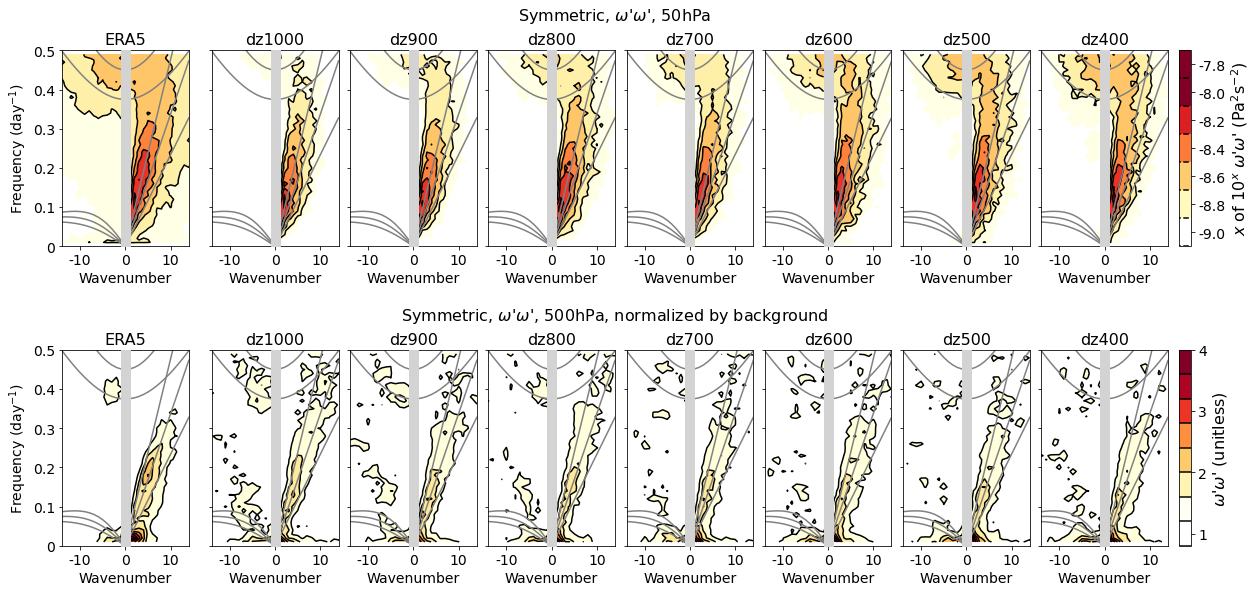

In [10]:
fig = plt.figure(figsize=(16,16))
xlim=14

#---symetric omega at 50hPa
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/WKdiags/"
p=50 ; lat=5
era5 = xr.open_dataset(basepath+'ERA5_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz1000 = xr.open_dataset(basepath+'dz1000_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz900 = xr.open_dataset(basepath+'dz900_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz800 = xr.open_dataset(basepath+'dz800_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz700 = xr.open_dataset(basepath+'dz700_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz600 = xr.open_dataset(basepath+'dz600_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz500 = xr.open_dataset(basepath+'dz500_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz400 = xr.open_dataset(basepath+'dz400_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')

ci=0.2 ; cmin=-9 ; cmax=-8

component='symmetric'

y1=0.8 ; y2=0.97

ax = myplots.plotWK(fig, np.log10(era5.cospec_latavg.sel(component=component)), era5.k, era5.w, ci, cmin, cmax,
                    'ERA5',0.,0.11,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz1000.cospec_latavg.sel(component=component)), dz1000.k, dz1000.w, ci, cmin, cmax,
                    'dz1000',0.13,0.24,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz900.cospec_latavg.sel(component=component)), dz900.k, dz900.w, ci, cmin, cmax,
                    'dz900',0.25,0.36,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz800.cospec_latavg.sel(component=component)), dz800.k, dz800.w, ci, cmin, cmax,
                    'dz800',0.37,0.48,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz700.cospec_latavg.sel(component=component)), dz700.k, dz700.w, ci, cmin, cmax,
                    'dz700',0.49,0.6,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz600.cospec_latavg.sel(component=component)), dz600.k, dz600.w, ci, cmin, cmax,
                    'dz600',0.61,0.72,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz500.cospec_latavg.sel(component=component)), dz500.k, dz500.w, ci, cmin, cmax,
                    'dz500',0.73,0.84,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz400.cospec_latavg.sel(component=component)), dz400.k, dz400.w, ci, cmin, cmax,
                    'dz400',0.85,0.96,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)


ax = cbars.plotcolorbar_log10(fig, ci, cmin, cmax,"$x$ of 10$^{x}$ $\omega$'$\omega$' (Pa$^{2}$s$^{-2}$)", 0.97,0.98,y1,y2,orient='vertical', contourlines=True,
                              posonly=True, ticklabel10=False)

fig.text(0.48,y2+0.03,"Symmetric, $\omega$'$\omega$', 50hPa", fontsize=16, ha='center', va='center')



p=500 ; lat=5
era5 = xr.open_dataset(basepath+'ERA5_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz1000 = xr.open_dataset(basepath+'dz1000_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz900 = xr.open_dataset(basepath+'dz900_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz800 = xr.open_dataset(basepath+'dz800_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz700 = xr.open_dataset(basepath+'dz700_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz600 = xr.open_dataset(basepath+'dz600_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz500 = xr.open_dataset(basepath+'dz500_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
dz400 = xr.open_dataset(basepath+'dz400_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')

#y1=0.28 ; y2=0.45
y1=0.54 ; y2=0.71
ci=0.4 ; cmin=1 ; cmax=3.6

sig=0.5
dat = era5.cospec_latavg.sel(component=component)/era5.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'ERA5',0.,0.11,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

dat = dz1000.cospec_latavg.sel(component=component)/dz1000.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'dz1000',0.13,0.24,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

dat = dz900.cospec_latavg.sel(component=component)/dz900.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'dz900',0.25,0.36,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

dat = dz800.cospec_latavg.sel(component=component)/dz800.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'dz800',0.37,0.48,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

dat = dz700.cospec_latavg.sel(component=component)/dz700.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'dz700',0.49,0.6,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

dat = dz600.cospec_latavg.sel(component=component)/dz600.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'dz600',0.61,0.72,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

dat = dz500.cospec_latavg.sel(component=component)/dz500.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'dz500',0.73,0.84,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

dat = dz400.cospec_latavg.sel(component=component)/dz400.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'dz400',0.85,0.96,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = cbars.plotcolorbar(fig, ci, cmin, cmax,"$\omega$'$\omega$' (unitless)", 0.97,0.98,y1,y2,orient='vertical', contourlines=True,
                              posonly='True')


fig.text(0.48,y2+0.03,"Symmetric, $\omega$'$\omega$', 500hPa, normalized by background", fontsize=16, ha='center', va='center')





fig.savefig(plotpath+'fig7.pdf', bbox_inches='tight', facecolor='white')